In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy import stats
from matplotlib.ticker import FuncFormatter

## Load Clean and Merged File

In [165]:
plot_df = pd.read_csv("../cesar_census/output/census_data_county.csv")
#plot_df = plot_df.drop(['Unnamed: 0'], axis=1)
plot_df

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Households with Internet,Households with Just Cell Data Plan,Households with DSL or Fiber Optic,Households with Broadband Any Type,Households with Celular Data Plan,Households with Just DSL or Fiber Optic,Households with Satellite Internet,Households with Just Satellite Internet,Households with No Internet
0,72,"Corozal Municipio, Puerto Rico",34933.0,38.1,14752.0,7887.0,19146.0,54.807775,9.435205,11026.0,2381.0,2268.0,5021.0,4088.0,706.0,361.0,161.0,5686.0
1,72,"Maunabo Municipio, Puerto Rico",11297.0,43.5,17636.0,8830.0,5945.0,52.624591,6.506152,3976.0,434.0,1078.0,1577.0,987.0,512.0,77.0,37.0,2157.0
2,72,"Peñuelas Municipio, Puerto Rico",21661.0,36.4,16868.0,7983.0,12379.0,57.148793,7.391164,7132.0,1361.0,2329.0,3877.0,3090.0,736.0,181.0,27.0,2972.0
3,72,"Ponce Municipio, Puerto Rico",148863.0,39.5,16561.0,10775.0,75187.0,50.507514,4.711043,53341.0,5613.0,18366.0,25211.0,17691.0,6802.0,1210.0,510.0,25042.0
4,72,"San Sebastián Municipio, Puerto Rico",38970.0,42.0,14275.0,8072.0,21472.0,55.098794,8.486015,14278.0,1525.0,2446.0,4743.0,2737.0,1335.0,829.0,456.0,8622.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,55,"Iowa County, Wisconsin",23576.0,42.5,60017.0,31717.0,2100.0,8.907363,1.895996,9799.0,1005.0,5301.0,7486.0,4180.0,2566.0,1177.0,560.0,1893.0
3216,55,"Pepin County, Wisconsin",7282.0,45.8,51470.0,27901.0,938.0,12.881077,1.757759,3005.0,224.0,1969.0,2321.0,1430.0,813.0,168.0,35.0,583.0
3217,55,"Ozaukee County, Wisconsin",87817.0,43.9,80526.0,45820.0,5087.0,5.792728,1.637496,35044.0,1978.0,26993.0,29934.0,20099.0,9122.0,1763.0,277.0,4033.0
3218,55,"Portage County, Wisconsin",70371.0,36.6,54620.0,28363.0,8757.0,12.444047,2.569240,28072.0,2469.0,19121.0,22790.0,14096.0,7623.0,1635.0,614.0,4290.0


## Scatter Plot and Linear Regression

### Verify Data Type to be able to Plot

In [166]:
plot_df.dtypes

State                                        int64
Name                                        object
Population                                 float64
Median Age                                 float64
Household Income                           float64
Per Capita Income                          float64
Poverty Count                              float64
Poverty Rate                               float64
Unemployment Rate                          float64
Households with Internet                   float64
Households with Just Cell Data Plan        float64
Households with DSL or Fiber Optic         float64
Households with Broadband Any Type         float64
Households with Celular Data Plan          float64
Households with Just DSL or Fiber Optic    float64
Households with Satellite Internet         float64
Households with Just Satellite Internet    float64
Households with No Internet                float64
dtype: object

### Define a Function to Scatter Plot and Linear Regression

In [167]:
# Function to scatter plot and linear regression

def scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, eq_location):
    # Define the Location of the Linear Regression Equation
    if eq_location == 'UpperRight':
        loc_x = x_values.max() - (x_values.max()-x_values.min())/2
        loc_y = y_values.max() - (y_values.max()-y_values.min())/8
    elif eq_location == 'LowerRight':
        loc_x = x_values.max() - (x_values.max()-x_values.min())/2
        loc_y = y_values.min() 
    elif eq_location == 'UpperLeft':
        loc_x = x_values.min()
        loc_y = y_values.max() - (y_values.max()-y_values.min())/8
    elif eq_location == 'LowerLeft':
        loc_x = x_values.min()
        loc_y = y_values.min()
    elif eq_location == 'Middle':
        loc_x = (x_values.max()+ x_values.min()) / 2
        loc_y = (y_values.max()+ y_values.min()) / 2
    
    # Perform a linear regression on latitude vs. temperature
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    # print(regress_values)

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create Plot

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"firebrick")

    # Label plot and annotate the line equation and r-squared
    #plt.annotate( f'{line_eq} \n r-squared = {"%0.4f"% rvalue}',(loc_x,  loc_y),
    #             fontsize=15,color="firebrick")   
    
    plt.annotate( f'r-squared = {"%0.4f"% rvalue}',(loc_x,  loc_y),
                  fontsize=15,color="firebrick")   
    
    
    chart_title_1 = chart_title.split('vs.')[0]
    chart_title_2 = chart_title.split('vs.')[1]
    
    plt.title(f'{chart_title_1} vs.\n {chart_title_2}' ,fontweight="bold");

    
    plt.xlabel(x_label ,fontweight="bold");
    plt.ylabel(y_label ,fontweight="bold");
    plt.grid(b=None, which='major', axis='both')
    
    
    # Save Plot
    plt.savefig(file_name +'.png',bbox_inches='tight')
    
    
    # Print r square value
    print(f"The r-squared is: {rvalue}")
    if rvalue < 0:
        print(f'Because the r-squared is negative:{"%0.4f"% rvalue},')
        print(f'the model "{line_eq}" explains the data really poorly.')  
        print(f'The sum of the squared residuals of the regression are lower than')  
        print(f'the sum of the squared residuals of the mean.')
        print(f'In other words, a line built with the mean of "{y_label}",')
        print(f'respresents better the data than the regression model.') 
    else:
        if rvalue < 0.4:
            correlation = 'very low'
        elif rvalue > 0.7:
            correlation = 'strong'
        else:  
            correlation = 'modest'
        
        print(f'In the model {line_eq}: ')
        print(f'{"%0.2f"% (rvalue*100)}% of the variations in "{y_label}"')
        print(f'are explained by variations in "{x_label}".')
        print(f'"{y_label}" and "{x_label}" have a {correlation} correlation.')

    # Show plot
    plt.show()


In [168]:
plot_df.columns

Index(['State', 'Name', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Count', 'Poverty Rate',
       'Unemployment Rate', 'Households with Internet',
       'Households with Just Cell Data Plan',
       'Households with DSL or Fiber Optic',
       'Households with Broadband Any Type',
       'Households with Celular Data Plan',
       'Households with Just DSL or Fiber Optic',
       'Households with Satellite Internet',
       'Households with Just Satellite Internet',
       'Households with No Internet'],
      dtype='object')

### Household Income vs. Celular Data Plans (2017)

The r-squared is: 0.25019675097901745
In the model y = 2.05x + -62947.32: 
25.02% of the variations in "HHs per County w Celular Data Plan"
are explained by variations in "Avg. HH Income per County".
"HHs per County w Celular Data Plan" and "Avg. HH Income per County" have a very low correlation.


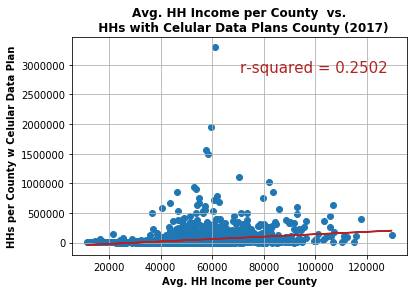

In [169]:
x_values = plot_df["Household Income"]
y_values = plot_df["Households with Internet"]
chart_title = "Avg. HH Income per County vs. HHs with Celular Data Plans County (2017)"
file_name = "output/" +"Fig.1 - " + chart_title
x_label = "Avg. HH Income per County"
y_label = "HHs per County w Celular Data Plan"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label,'UpperRight')

### Population vs. Celular Data Plans (2017)

The r-squared is: 0.9898709162189062
In the model y = 0.18x + 134.4: 
98.99% of the variations in "HH per County w Celular Data Plan"
are explained by variations in "Population per County".
"HH per County w Celular Data Plan" and "Population per County" have a strong correlation.


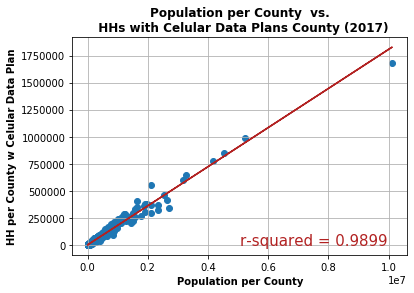

In [170]:
x_values = plot_df["Population"]
y_values = plot_df["Households with Celular Data Plan"]
chart_title = "Population per County vs. HHs with Celular Data Plans County (2017)"
file_name = "output/" +"Fig.2 - " + chart_title
x_label = "Population per County"
y_label = "HH per County w Celular Data Plan"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label,'LowerRight')

### Median Age vs. Celular Data Plans (2017)

The r-squared is: -0.17486799739499895
Because the r-squared is negative:-0.1749,
the model "y = -1945.66x + 98359.98" explains the data really poorly.
The sum of the squared residuals of the regression are lower than
the sum of the squared residuals of the mean.
In other words, a line built with the mean of "HH per County w Celular Data Plan",
respresents better the data than the regression model.


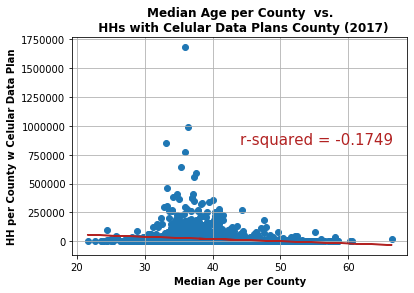

In [171]:
x_values = plot_df["Median Age"]
y_values = plot_df["Households with Celular Data Plan"]
chart_title = "Median Age per County vs. HHs with Celular Data Plans County (2017)"
file_name = "output/" +"Fig.3 - " + chart_title
x_label = "Median Age per County"
y_label = "HH per County w Celular Data Plan"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label,'Middle')

### Per Capita Income vs. Celular Data Plans (2017)

The r-squared is: 0.2922652151144516
In the model y = 2.6x + -48287.62: 
29.23% of the variations in "HH per County w Celular Data Plan"
are explained by variations in "Avg. Per Capita Income per County ".
"HH per County w Celular Data Plan" and "Avg. Per Capita Income per County " have a very low correlation.


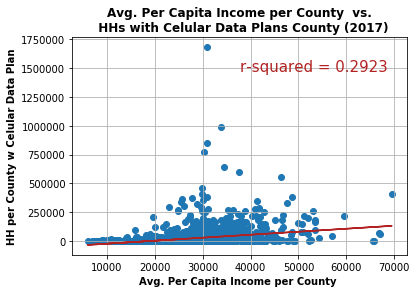

In [172]:
x_values = plot_df["Per Capita Income"]
y_values = plot_df["Households with Celular Data Plan"]
chart_title = "Avg. Per Capita Income per County vs. HHs with Celular Data Plans County (2017)"
file_name = "output/" +"Fig.4 - " + chart_title
x_label = "Avg. Per Capita Income per County "
y_label = "HH per County w Celular Data Plan"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label,'UpperRight')

### Poverty Count vs. Celular Data Plans (2017)

The r-squared is: 0.9370728474307051
In the model y = 1.09x + 2442.15: 
93.71% of the variations in "HH per County w Celular Data Plan"
are explained by variations in "Poverty Count per County".
"HH per County w Celular Data Plan" and "Poverty Count per County" have a strong correlation.


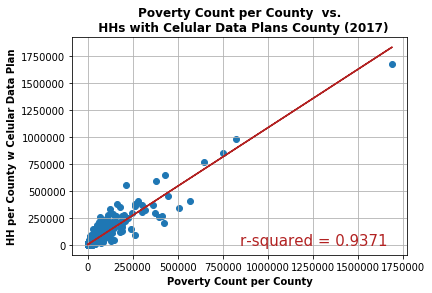

In [173]:
x_values = plot_df["Poverty Count"]
y_values = plot_df["Households with Celular Data Plan"]
chart_title = "Poverty Count per County vs. HHs with Celular Data Plans County (2017)"
file_name = "output/" +"Fig.5 - " + chart_title
x_label = "Poverty Count per County"
y_label = "HH per County w Celular Data Plan"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label,'LowerRight')

### Unemployment Rate vs. Celular Data Plans (2017)

The r-squared is: 0.0708760419003874
In the model y = 3022.22x + 9382.49: 
7.09% of the variations in "HH per County w Celular Data Plan"
are explained by variations in "Unemployment Rate per County".
"HH per County w Celular Data Plan" and "Unemployment Rate per County" have a very low correlation.


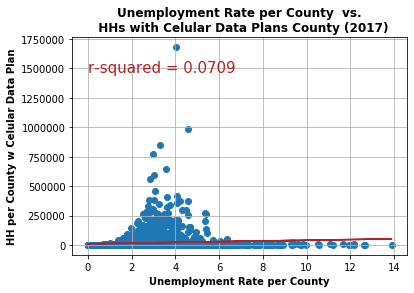

In [174]:
x_values = plot_df["Unemployment Rate"]
y_values = plot_df["Households with Celular Data Plan"]
chart_title = "Unemployment Rate per County vs. HHs with Celular Data Plans County (2017)"
file_name = "output/" +"Fig.6 - " + chart_title
x_label = "Unemployment Rate per County"
y_label = "HH per County w Celular Data Plan"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label,'UpperLeft')

### Top Ten Most Populated Counties

In [175]:
top_ten = plot_df.sort_values(by=['Population'], ascending=False)
top_ten = top_ten.reset_index(drop=True)
top_ten = top_ten.head(10)
top_ten

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Households with Internet,Households with Just Cell Data Plan,Households with DSL or Fiber Optic,Households with Broadband Any Type,Households with Celular Data Plan,Households with Just DSL or Fiber Optic,Households with Satellite Internet,Households with Just Satellite Internet,Households with No Internet
0,6,"Los Angeles County, California",10105722.0,36.0,61015.0,30798.0,1688505.0,16.708405,4.021741,3295198.0,220563.0,2306545.0,2633021.0,1680314.0,865663.0,199009.0,31351.0,538359.0
1,17,"Cook County, Illinois",5238541.0,36.4,59426.0,33722.0,821572.0,15.683222,4.592977,1956561.0,135811.0,1319255.0,1500290.0,986543.0,465829.0,89105.0,13312.0,359116.0
2,48,"Harris County, Texas",4525519.0,33.1,57791.0,30856.0,751985.0,16.616547,3.296683,1562813.0,183317.0,999605.0,1225570.0,848627.0,345502.0,82925.0,12605.0,275630.0
3,4,"Maricopa County, Arizona",4155501.0,36.0,58580.0,30186.0,644476.0,15.508984,2.989050,1489533.0,109769.0,1058044.0,1216868.0,773917.0,400895.0,94168.0,18396.0,216082.0
4,6,"San Diego County, California",3283665.0,35.4,70588.0,34350.0,427031.0,13.004707,3.555722,1111739.0,62443.0,876765.0,966430.0,645331.0,293588.0,70951.0,9144.0,118026.0
5,6,"Orange County, California",3155816.0,37.5,81851.0,37603.0,378459.0,11.992429,3.043238,1024976.0,65346.0,809341.0,899047.0,595764.0,281067.0,55099.0,6522.0,97075.0
6,12,"Miami-Dade County, Florida",2702602.0,39.5,46338.0,25481.0,505182.0,18.692430,3.735955,858289.0,58131.0,551091.0,627883.0,342068.0,263935.0,44337.0,8004.0,193906.0
7,36,"Kings County, New York",2635121.0,34.8,52782.0,29928.0,570731.0,21.658626,4.059624,944650.0,51781.0,645169.0,711897.0,411665.0,281626.0,26654.0,3888.0,200226.0
8,48,"Dallas County, Texas",2552213.0,33.3,53626.0,29810.0,446611.0,17.498971,3.081287,906179.0,92944.0,571741.0,692870.0,457642.0,201750.0,41337.0,6080.0,182720.0
9,6,"Riverside County, California",2355002.0,35.0,60807.0,25700.0,362215.0,15.380666,4.559784,711724.0,49560.0,515473.0,588200.0,369086.0,195954.0,45073.0,7686.0,101093.0


### Export of The Top Ten Most Populated Counties

In [176]:
top_ten.to_csv(r'output/top_ten.csv')

### Top Ten Least Populated Counties

In [177]:
worse_ten = plot_df.sort_values(by=['Population'], ascending=True)
worse_ten = worse_ten.reset_index(drop=True)
worse_ten = worse_ten.head(10)
worse_ten

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Households with Internet,Households with Just Cell Data Plan,Households with DSL or Fiber Optic,Households with Broadband Any Type,Households with Celular Data Plan,Households with Just DSL or Fiber Optic,Households with Satellite Internet,Households with Just Satellite Internet,Households with No Internet
0,48,"Loving County, Texas",74.0,57.5,80938.0,35530.0,12.0,16.216216,0.000000,31.0,7.0,7.0,20.0,13.0,7.0,6.0,0.0,11.0
1,15,"Kalawao County, Hawaii",86.0,57.6,61750.0,46024.0,10.0,11.627907,0.000000,53.0,7.0,25.0,32.0,21.0,11.0,2.0,0.0,18.0
2,48,"King County, Texas",289.0,32.7,56964.0,29918.0,10.0,3.460208,3.806228,101.0,10.0,52.0,74.0,53.0,19.0,13.0,0.0,16.0
3,31,"Arthur County, Nebraska",421.0,43.3,41250.0,21799.0,46.0,10.926366,0.237530,177.0,10.0,105.0,123.0,59.0,55.0,15.0,5.0,44.0
4,31,"McPherson County, Nebraska",432.0,48.5,60714.0,27241.0,69.0,15.972222,0.000000,192.0,27.0,51.0,119.0,59.0,24.0,41.0,36.0,69.0
5,30,"Petroleum County, Montana",453.0,51.7,46429.0,31549.0,45.0,9.933775,3.090508,206.0,3.0,133.0,152.0,69.0,69.0,16.0,13.0,42.0
6,31,"Blaine County, Nebraska",502.0,46.8,52000.0,28503.0,49.0,9.760956,0.597610,232.0,14.0,156.0,182.0,93.0,80.0,24.0,2.0,43.0
7,31,"Loup County, Nebraska",537.0,52.8,58625.0,29248.0,48.0,8.938547,0.372439,245.0,11.0,139.0,165.0,105.0,56.0,17.0,3.0,65.0
8,35,"Harding County, New Mexico",546.0,58.4,35096.0,30782.0,108.0,19.780220,2.564103,203.0,6.0,81.0,96.0,37.0,49.0,17.0,5.0,101.0
9,48,"Kenedy County, Texas",564.0,29.8,24800.0,13705.0,140.0,24.822695,0.000000,152.0,28.0,24.0,55.0,40.0,15.0,3.0,0.0,97.0


### Export of The Top Ten Least Populated Counties

In [178]:
worse_ten.to_csv(r'output/worse_ten.csv')